<a href="https://colab.research.google.com/github/chiranjanroy/gr-limesdr/blob/master/CS725_FML_Course_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import_Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

## Reading_data_file

In [ ]:
data_set = pd.read_csv('/content/sample_data/Flipkart_Mobiles.csv')
data_set.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990


In [ ]:
data_set.tail()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
3109,SAMSUNG,M52 5G,Blazing Black,6 GB,128 GB,4.3,25990,25990
3110,SAMSUNG,M52 5G,Icy Blue,6 GB,128 GB,4.3,25489,28449
3111,SAMSUNG,M52 5G,Icy Blue,8 GB,128 GB,4.3,27239,31489
3112,SAMSUNG,M52 5G,Slate Black,8 GB,128 GB,4.2,22989,22989
3113,SAMSUNG,M52 5G,Sky Blue,8 GB,128 GB,4.2,20350,22595


In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           3114 non-null   object 
 1   Model           3114 non-null   object 
 2   Color           3114 non-null   object 
 3   Memory          3071 non-null   object 
 4   Storage         3075 non-null   object 
 5   Rating          2970 non-null   float64
 6   Selling Price   3114 non-null   int64  
 7   Original Price  3114 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 194.8+ KB


In [ ]:
a = data_set.duplicated()
for i in range (a.shape[0]):
  if a[i] :
    print (i)

144
192
193
449
631
632
633
774
777
798
935
936
959
983
1007
1031
1055
1076
1079
1095
1103
1113
1114
1115
1153
1162
1185
1194
1280
1281
1284
1286
1289
1291
1293
1295
1296
1303
1304
1307
1310
1311
1312
1318
1320
1321
1326
1327
1329
1334
1336
1338
1340
1341
1343
1345
1346
1347
1348
1349
1353
1354
1355
1356
1358
1360
1361
1362
1363
1364
1365
1366
1367
1368
1369
1370
1371
1372
1374
1375
1382
1390
1448
1467
1471
1475
1477
1556
1557
1558
1559
1584
1604
1605
1606
1607
1676
1751
1760
1820
1821
1859
2203
2275
2367
2403
2404
2909


In [ ]:
data_set.drop_duplicates(inplace = True)
data_set.shape
data_set.tail()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
3109,SAMSUNG,M52 5G,Blazing Black,6 GB,128 GB,4.3,25990,25990
3110,SAMSUNG,M52 5G,Icy Blue,6 GB,128 GB,4.3,25489,28449
3111,SAMSUNG,M52 5G,Icy Blue,8 GB,128 GB,4.3,27239,31489
3112,SAMSUNG,M52 5G,Slate Black,8 GB,128 GB,4.2,22989,22989
3113,SAMSUNG,M52 5G,Sky Blue,8 GB,128 GB,4.2,20350,22595


In [ ]:
data_set.isnull().sum()

Brand               0
Model               0
Color               0
Memory             40
Storage            39
Rating            130
Selling Price       0
Original Price      0
dtype: int64

In [ ]:
data_set1 = data_set.fillna(0)

In [ ]:
data_set1.isnull().sum()

Brand             0
Model             0
Color             0
Memory            0
Storage           0
Rating            0
Selling Price     0
Original Price    0
dtype: int64

In [ ]:
data_set1.nunique(axis=0, dropna=True)

Brand              17
Model             914
Color             639
Memory             27
Storage            27
Rating             26
Selling Price     844
Original Price    819
dtype: int64

In [ ]:
data_set.describe()

,Rating,Selling Price,Original Price
count,2876.000000,3006.000000,3006.000000
mean,4.236057,25842.448436,27722.581504
std,0.270684,29658.810517,31117.486618
min,2.300000,1000.000000,1000.000000
25%,4.100000,9978.500000,10000.000000
50%,4.300000,14999.000000,15999.000000
75%,4.400000,27499.000000,29999.000000
max,5.000000,179900.000000,189999.000000


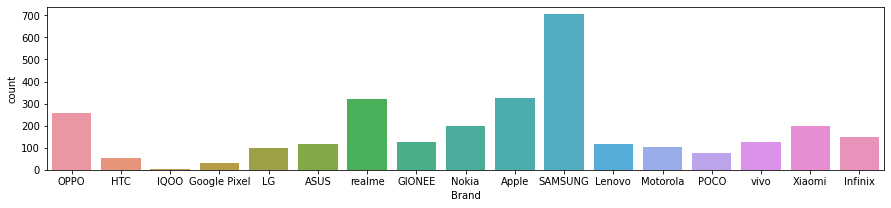

In [ ]:
fig, ax = plt.subplots(figsize=(15,3))
ax=sns.countplot(x="Brand", data=data_set1)

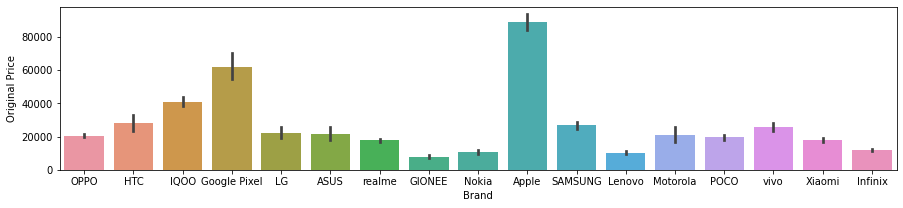

In [ ]:
fig, ax = plt.subplots(figsize=(15,3))
ax=sns.barplot(x="Brand",y="Original Price", data=data_set1)

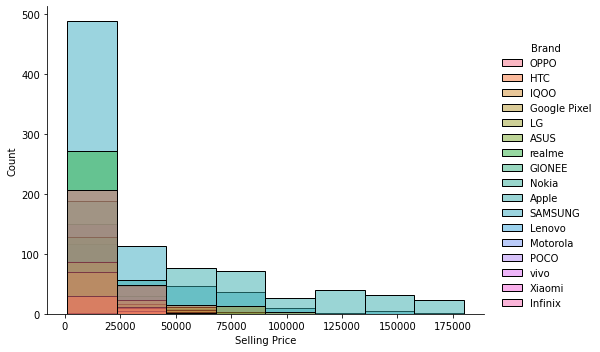

In [ ]:
sns.displot(data_set1, x='Selling Price',bins=8, hue='Brand',aspect=1.4)

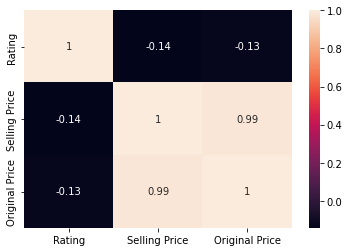

In [ ]:
ax = sns.heatmap(data_set1.corr(), annot=True)

Remarks: We tried to look into the data set and found that the flipkart mobile dataset has limited no. of features (only 9 different fetures) and also the data set contains fetaure like details of brands and models etc. Major price bearing fetures like camera , screen sizes etc. are not the part of the data set. 

Going forward with this kind of data set, the model may not provide much accuracy when given with inputs hence, we considered data set with more features with relevance. The more relevant data for price prediction from Kaggle is hence considered. 

# New_data_set (more_features)

## Reading of data set

In [ ]:
data_new_features = pd.read_csv('/content/sample_data/train.csv')
data_new_features.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
data_new_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

###Dependency of PRICE RANGE over RAM

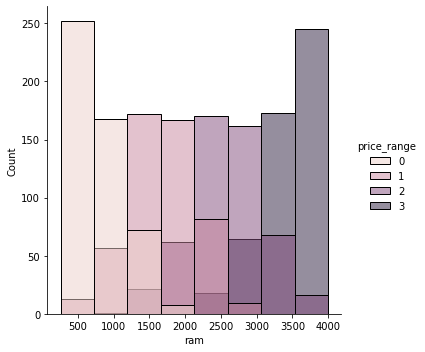

In [ ]:
sns.displot(data_new_features, x='ram', bins=8, hue='price_range',aspect=1.0)

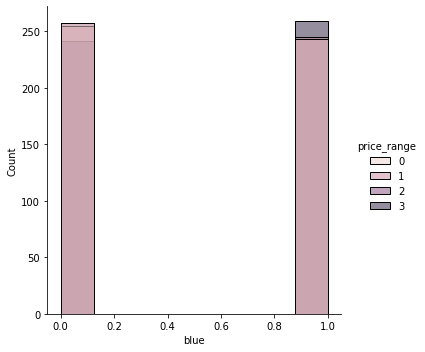

In [ ]:
sns.displot(data_new_features, x='blue', bins=8, hue='price_range',aspect=1.0)

In [ ]:
data_new_features.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
data_new_features.describe ()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Correlation matrix

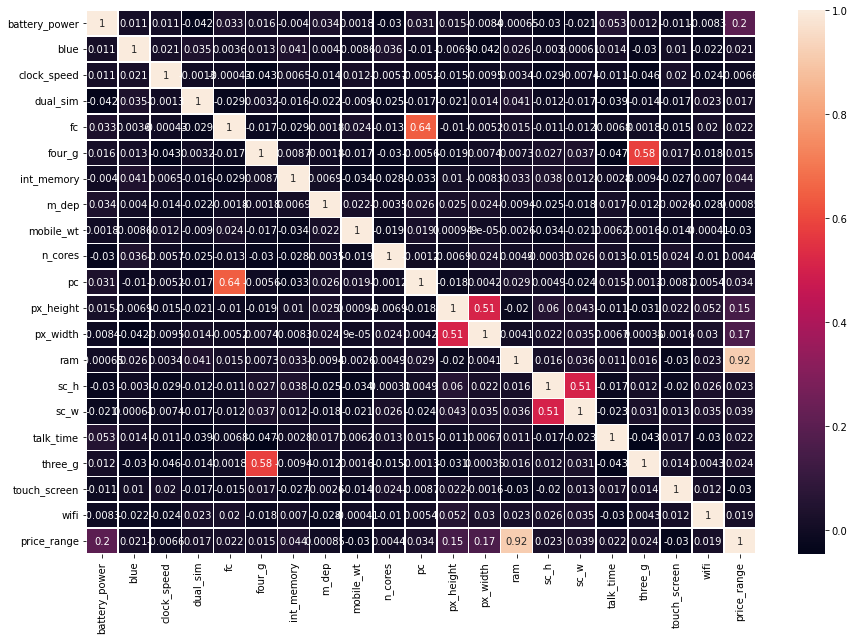

In [ ]:
plt.figure(figsize=(15, 10))
ax1 = sns.heatmap(data_new_features.corr(), annot=True,  linewidths = 0.5)
plt.show()

Remarks: The features within the datasets are found not co-related and hence the data sets can be taken as it is.

## Splitting of Input and Output from data set

In [ ]:
y = data_new_features['price_range']
x = data_new_features.drop('price_range', axis = 1)
print(y.shape)
print(x.shape)
y.unique()

(2000,)
(2000, 20)


array([1, 2, 3, 0])

## Distribution of price range

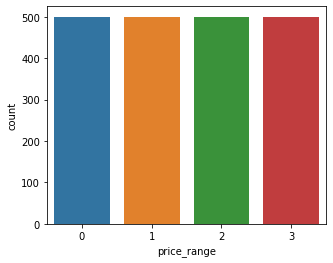

In [ ]:
plt.figure(figsize=(5, 4))
ax2=sns.countplot(x=data_new_features['price_range'], data=data_new_features)
plt.show()

Remarks: The distribution of data over all price range is equally distributed

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 91)
print(x_train.shape)
print(x_test.shape)

(1600, 20)
(400, 20)


In [ ]:
epoc = 100
train_score = []
test_score = []
epoc_value = []

for epoc in range (100, 5001, 100): 
    logreg = LogisticRegression(multi_class = 'multinomial', solver = 'sag',  max_iter = epoc)
    logreg.fit(x_train, y_train)
    y_train_pred_logreg = logreg.predict(x_train)
    y_test_pred_logreg = logreg.predict(x_test)
    train_score.append (logreg.score(x_train, y_train))
    test_score.append (logreg.score(x_test, y_test))
    epoc_value.append (epoc)


print('Training accuracy for Logistic regression model', logreg.score(x_train, y_train))
print('Test accuracy for Logistic regression model', logreg.score(x_test, y_test))
print (type(train_score))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

Training accuracy for Logistic regression model 0.71125
Test accuracy for Logistic regression model 0.6625
<class 'list'>


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Text(0, 0.5, 'Score')

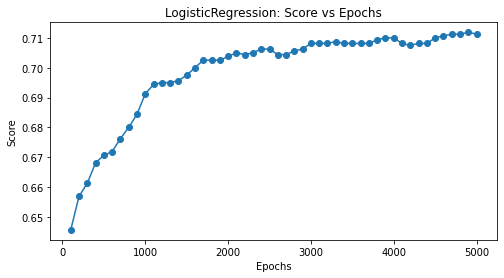

In [ ]:
plt.figure (figsize = (8,4))
plt.plot(epoc_value, train_score, marker = 'o')
plt.title ('LogisticRegression: Score vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Score')

In [ ]:
logreg = LogisticRegression(multi_class = 'multinomial', solver = 'sag',  max_iter = 5000)
logreg.fit(x_train, y_train)
y_train_pred_logreg = logreg.predict(x_train)
y_test_pred_logreg = logreg.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


## Confusion Matrix for preditions for Logistic Regression model

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


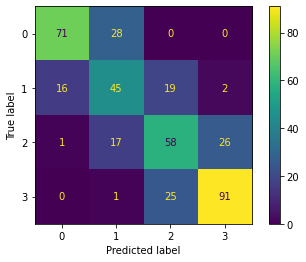

In [ ]:
plot_confusion_matrix(logreg, x_test, y_test)  
plt.show()

In [ ]:
accuracy_logreg_train = metrics.accuracy_score(y_train, y_train_pred_logreg)
accuracy_logreg_test = metrics.accuracy_score(y_test, y_test_pred_logreg)
print ('Training accuracy', accuracy_logreg_train * 100, '%')
print ('Test accuracy', accuracy_logreg_test * 100, '%')

Training accuracy 71.125 %
Test accuracy 66.25 %


Remarks: The training accuracy found 71% (aaprox)  which is very less in case of logistic regression model. The test accuracy is found to be 66% (approx) is even lesser than the training accuracy

In [ ]:
data_test = pd.read_csv('/content/sample_data/test.csv')
data_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


## Final test data prediction

In [ ]:
final_x_test = data_test.drop('id', axis = 1)
final_y_pred_test = logreg.predict(x_test)
print (final_y_pred_test)

[3 2 0 0 3 1 2 3 1 1 3 1 1 3 3 1 3 0 0 3 3 3 2 0 2 1 3 2 2 2 0 2 0 3 2 3 0
 3 2 0 0 3 3 3 2 1 0 2 0 3 3 3 3 2 0 3 2 3 2 3 2 3 3 0 1 2 0 0 2 3 0 3 3 2
 1 1 3 2 3 1 3 1 1 2 0 0 1 3 1 2 2 3 3 3 2 1 1 3 0 3 3 0 3 2 0 1 3 0 2 1 0
 0 1 3 2 1 2 0 3 0 1 2 0 3 3 3 0 2 3 0 3 0 0 2 0 3 3 3 0 0 2 0 1 1 1 2 3 3
 2 0 3 2 3 0 2 1 3 0 0 3 2 0 2 3 0 2 1 0 3 2 0 3 0 0 0 0 3 2 0 1 1 1 1 0 0
 3 3 0 0 1 2 1 1 0 1 1 2 2 0 2 2 1 3 1 1 1 3 0 1 2 2 3 3 2 3 3 3 3 3 1 2 3
 2 1 1 1 1 3 3 3 0 2 1 1 1 1 3 1 2 1 3 0 0 0 2 3 3 3 0 1 1 3 0 1 0 2 2 3 2
 3 2 1 0 2 3 2 3 0 2 1 2 1 3 3 3 0 1 3 2 2 3 2 3 3 3 0 1 3 2 3 2 1 1 1 1 1
 2 0 3 3 0 2 1 2 3 2 2 3 0 0 3 1 2 1 0 0 1 2 2 2 2 1 3 2 3 2 0 0 0 1 2 2 3
 2 2 1 1 2 3 3 2 3 3 3 1 0 1 0 3 1 2 2 2 2 2 3 2 0 2 2 3 0 0 0 1 0 0 2 3 1
 2 0 3 3 0 1 3 3 2 1 3 2 2 0 1 1 1 3 1 2 2 1 1 1 2 0 1 2 1 1]


# Decision Tree

In [ ]:
d_tree = DecisionTreeClassifier(random_state=91)
d_tree.fit(x_train, y_train)
y_pred_d_tree_train = d_tree.predict (x_train)
y_pred_d_tree_test = d_tree.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


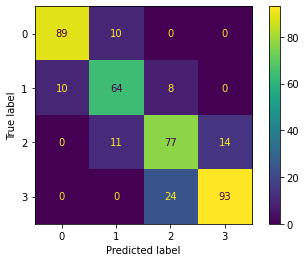

In [ ]:
plot_confusion_matrix (d_tree, x_test, y_test)  
plt.show()

In [ ]:
accuracy_d_tree_train = metrics.accuracy_score(y_train, y_pred_d_tree_train)
accuracy_d_tree_test = metrics.accuracy_score(y_test, y_pred_d_tree_test)
print ('Training accuracy', accuracy_d_tree_train * 100, '%')
print ('Test accuracy', accuracy_d_tree_test * 100, '%')

Training accuracy 100.0 %
Test accuracy 80.75 %


In [ ]:
print(metrics.classification_report(y_test, y_pred_d_tree_test)) 

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        99
           1       0.75      0.78      0.77        82
           2       0.71      0.75      0.73       102
           3       0.87      0.79      0.83       117

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



#Random Forest

In [ ]:
train_score = []
test_score = []
estimate_value = []

for estimate in range (1, 31, 1): 
    rand_forest = RandomForestClassifier(n_estimators = estimate, random_state=91, criterion = 'entropy', oob_score = True) 
    rand_forest.fit(x_train, y_train)
    y_pred_rand_forest_train = rand_forest.predict (x_train)
    y_pred_rand_forest_test = rand_forest.predict(x_test)
    train_score.append (rand_forest.score(x_train, y_train))
    test_score.append (rand_forest.score(x_test, y_test))
    estimate_value.append (estimate)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. Thi

Text(0, 0.5, 'Test Score')

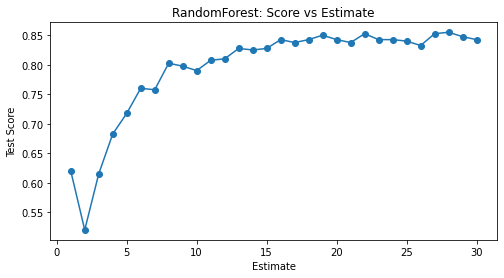

In [ ]:
plt.figure (figsize = (8,4))
plt.plot(estimate_value, test_score, marker = 'o')
plt.title ('RandomForest: Score vs Estimate')
plt.xlabel('Estimate')
plt.ylabel('Test Score')

In [ ]:
rand_forest = RandomForestClassifier(n_estimators = 30, random_state=91, criterion = 'entropy', oob_score = True) 
rand_forest.fit(x_train, y_train)
y_pred_rand_forest_train = rand_forest.predict (x_train)
y_pred_rand_forest_test = rand_forest.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


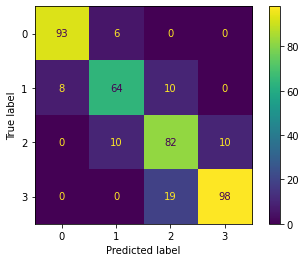

In [ ]:
plot_confusion_matrix(rand_forest, x_test, y_test)  
plt.show()

In [ ]:
accuracy_rand_forest_train = metrics.accuracy_score(y_train, y_pred_rand_forest_train)
accuracy_rand_forest_test = metrics.accuracy_score(y_test, y_pred_rand_forest_test)
print ('Training accuracy', accuracy_rand_forest_train * 100, '%')
print ('Test accuracy', accuracy_rand_forest_test * 100, '%')

Training accuracy 100.0 %
Test accuracy 84.25 %


In [ ]:
print(metrics.classification_report(y_test, y_pred_rand_forest_test)) 

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        99
           1       0.80      0.78      0.79        82
           2       0.74      0.80      0.77       102
           3       0.91      0.84      0.87       117

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.85      0.84      0.84       400



#KNN Classifier

##Choosing K-Value

In [ ]:
error_rate = []
for i in range (1, 80):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit (x_train, y_train)
  predict_n_neighbour = knn.predict(x_test)
  error_rate.append(np.mean(predict_n_neighbour != y_test))

Text(0, 0.5, 'Error Rate')

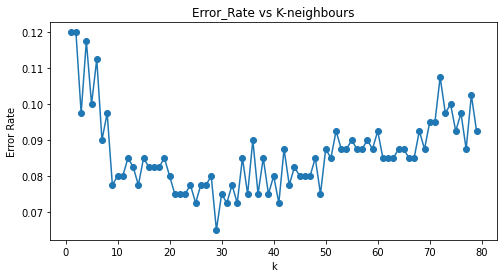

In [ ]:
plt.figure (figsize = (8,4))
plt.plot(range(1,80), error_rate, marker = 'o')
plt.title ('Error_Rate vs K-neighbours')
plt.xlabel('k')
plt.ylabel('Error Rate')

Optimum value of K can be 9 or 29.

Chosing 29 may result into overfitting of model. 

We proceed to choose the value of K as 9

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit (x_train, y_train)
y_pred_knn_train = knn.predict (x_train)
y_pred_knn_test = knn.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


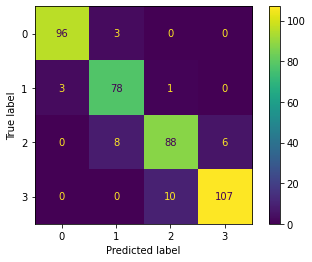

In [ ]:
plot_confusion_matrix(knn, x_test, y_test)  
plt.show()

In [ ]:
accuracy_knn_train = metrics.accuracy_score(y_train, y_pred_knn_train)
accuracy_knn_test = metrics.accuracy_score(y_test, y_pred_knn_test)
print ('Training accuracy', accuracy_knn_train * 100, '%')
print ('Test accuracy', accuracy_knn_test * 100, '%')

Training accuracy 94.625 %
Test accuracy 92.25 %


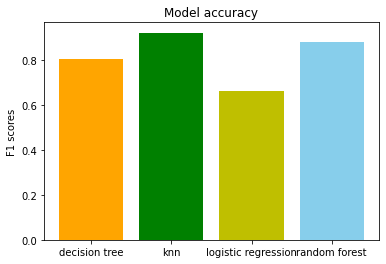

In [ ]:
models = ['decision tree', 'knn', 'logistic regression', 'random forest']
acc_scores = [accuracy_d_tree_test, accuracy_knn_test, accuracy_logreg_test,  accuracy_rand_forest_test]

plt.bar(models, acc_scores, color = ['orange', 'green', 'y', 'skyblue'])
plt.ylabel("F1 scores")
plt.title("Model accuracy")
plt.show()

##Artificial Neural Network Implementation

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import *
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
data_set = pd.read_csv('/content/sample_data/train.csv')
data_set.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
x_extract = data_set.iloc [:, 0:20]
y_extract = data_set.iloc [:, -1]

##Normalisation and scaling of data points

In [ ]:
sc = StandardScaler()
x = x_extract.values
print (x[1:]) 
y = y_extract.values
#x = sc.fit_transform(x)
y = y.reshape(-1,1)
print (y.shape)
print (type (y))
print (type (x))

##Converting output labels to one hot encoder

In [ ]:
onehot = OneHotEncoder()
y = onehot.fit_transform(y)
print (y[1,:])
print (y.shape)
print (type(y))
y = y.toarray()
print (type(y))
print (x.shape, y.shape)
print (y[1, :])

##Splitting of Training and testing data for ANN

### 80% traing and 20% test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=101)

##Model Hyper-Parameters

In [ ]:
model = Sequential()
model.add(Dense(40, activation='relu', input_dim = 20))
model.add(Dense(20, activation='relu'))
model.add(Dense(4,  activation='softmax'))
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=105, validation_data=(x_test, y_test), batch_size=64)

In [ ]:
y_predicted = model.predict(x_test)
print (y_predicted [1, :])

#lets do the inverse one hot encoding
predicted = []
for i in range(len(y_predicted)):
    predicted.append(np.argmax(y_predicted[i]))


print (predicted[1:10])
    
# also inverse encoding for y_test labels

test = []
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

##Accuracy Calculation 

In [ ]:
accuracy = accuracy_score(pred,test)
print("Accuracy of model is = " + str(accuracy*100))

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Features','Price_Weight'],loc='upper left')
plt.show()

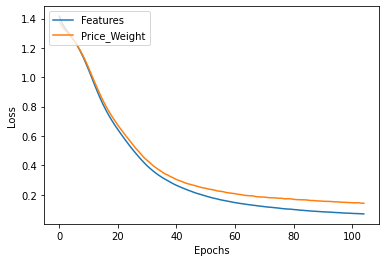

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Features','Price_Weight'],loc='upper left')
plt.show()